Data Dictionary

* market_id : integer id for the market where the restaurant lies
* created_at : the timestamp at which the order was placed
* actual_delivery_time : the timestamp when the order was delivered
* store_primary_category : category for the restaurant
* order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
* total_items
* subtotal : final price of the order
* num_distinct_items : the number of distinct items in the order
* min_item_price : price of the cheapest item in the order
* max_item_price : price of the costliest item in order
* total_onshift_partners : number of delivery partners on duty at the time order was placed
* total_busy_partners : number of delivery partners attending to other tasks
* total_outstanding_orders : total number of orders to be fulfilled at the moment

**1) Import the data and understand the structure of the data:**

*   usual exploratory analysis steps like checking the structure & characteristics of the dataset




In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('sample_data/dataset.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
3  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
4  f0ade77b43923b38237db569b016ba25                    NaN             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                    33.0                 14.0                      21.0  
1                     1.0                  2.0                       2.0  
2                     1.0                  0.0                       0.0  
3                     1.0                  1.0                       2.0  
4                     6.0                  6.0                       9.0

In [248]:
df.shape

(197428, 14)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [250]:
df.describe()

market_id  order_protocol    total_items       subtotal  \
count  196441.000000   196433.000000  197428.000000  197428.000000   
mean        2.978706        2.882352       3.196391    2682.331402   
std         1.524867        1.503771       2.666546    1823.093688   
min         1.000000        1.000000       1.000000       0.000000   
25%         2.000000        1.000000       2.000000    1400.000000   
50%         3.000000        3.000000       3.000000    2200.000000   
75%         4.000000        4.000000       4.000000    3395.000000   
max         6.000000        7.000000     411.000000   27100.000000   

       num_distinct_items  min_item_price  max_item_price  \
count       197428.000000   197428.000000   197428.000000   
mean             2.670791      686.218470     1159.588630   
std              1.630255      522.038648      558.411377   
min              1.000000      -86.000000        0.000000   
25%              1.000000      299.000000      800.000000   
50%              2.000000      595.000000     1095.000000   
75%              3.000000      949.000000     1395.000000   
max             20.000000    14700.000000    14700.000000   

       total_onshift_partners  total_busy_partners  total_outstanding_orders  
count           181166.000000        181166.000000             181166.000000  
mean                44.808093            41.739747                 58.050065  
std                 34.526783            32.145733                 52.661830  
min                 -4.000000            -5.000000                 -6.000000  
25%                 17.000000            15.000000                 17.000000  
50%                 37.000000            34.000000                 41.000000  
75%                 65.000000            62.000000                 85.000000  
max                171.000000           154.000000                285.000000

In [251]:
df[(df['market_id'].isna()) & ((df['created_at'].isna()) | df['actual_delivery_time'].isna()) ]

Empty DataFrame
Columns: [market_id, created_at, actual_delivery_time, store_id, store_primary_category, order_protocol, total_items, subtotal, num_distinct_items, min_item_price, max_item_price, total_onshift_partners, total_busy_partners, total_outstanding_orders]
Index: []

**2) Data preprocessing**
* Cleaning of data
* Feature engineering: Creating the target column time taken in each delivery from order timestamp (created_at) and delivery timestamp (actual_delivery_time)
* Getting hour of day from the order time and also the day of the week
* Get delivery time in minutes

In [252]:
len(df[((df['created_at'].isna()) | df['actual_delivery_time'].isna()) ])

7

**Since created_at and actual_delivery_time are crucial to calculate delivery time we can delete the records.**

In [253]:
df.dropna(subset=['created_at', 'actual_delivery_time'], inplace=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['hour_of_day'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek
df['delivery_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

**3) Handling null values**

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197421 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196434 non-null  float64       
 1   created_at                197421 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197421 non-null  object        
 4   store_primary_category    192661 non-null  object        
 5   order_protocol            196426 non-null  float64       
 6   total_items               197421 non-null  int64         
 7   subtotal                  197421 non-null  int64         
 8   num_distinct_items        197421 non-null  int64         
 9   min_item_price            197421 non-null  int64         
 10  max_item_price            197421 non-null  int64         
 11  total_onshift_partners    181159 non-null  float64       
 12  total_b

In [255]:
df['market_id'].value_counts()

market_id
2.0    55055
4.0    47597
1.0    38037
3.0    23296
5.0    17999
6.0    14450
Name: count, dtype: int64

In [256]:
unique_stores = df[~df['market_id'].isna()]
unique_stores = unique_stores[['store_id', 'market_id']].drop_duplicates()
unique_stores[unique_stores['market_id'].isna()]

Empty DataFrame
Columns: [store_id, market_id]
Index: []

In [257]:
mapping_dict = dict(zip(unique_stores['store_id'], unique_stores['market_id']))
df['market_id'] = df['market_id'].fillna(df['store_id'].map(mapping_dict))


**Since market id denotes the location of the restaurant, filled the Market id based on store Id.**

In [258]:
df[df['market_id'].isna()]

market_id          created_at actual_delivery_time  \
120923        NaN 2015-02-08 03:39:46  2015-02-08 04:25:31   
152850        NaN 2015-02-08 23:43:19  2015-02-09 00:33:20   
186154        NaN 2015-02-15 23:53:45  2015-02-16 00:25:42   

                                store_id store_primary_category  \
120923  c1d51344306860ede1fca0e6fbae369d                    NaN   
152850  ee9aecd92c396ac1108ad72106a74dc2                  pizza   
186154  d6d880bcb847d558f357434c6686a565               sandwich   

        order_protocol  total_items  subtotal  num_distinct_items  \
120923             NaN            3      3470                   3   
152850             NaN            2      3400                   2   
186154             NaN            3      1550                   2   

        min_item_price  max_item_price  total_onshift_partners  \
120923             725            1795                     NaN   
152850            1000            1400                     3.0   
186154             250             900                    14.0   

        total_busy_partners  total_outstanding_orders  hour_of_day  \
120923                  NaN                       NaN            3   
152850                  3.0                       3.0           23   
186154                 14.0                      18.0           23   

        day_of_week  delivery_time  
120923            6      45.750000  
152850            6      50.016667  
186154            6      31.950000

In [259]:
df[df['store_id'].isin(['c1d51344306860ede1fca0e6fbae369d','ee9aecd92c396ac1108ad72106a74dc2','d6d880bcb847d558f357434c6686a565'])]

market_id          created_at actual_delivery_time  \
120923        NaN 2015-02-08 03:39:46  2015-02-08 04:25:31   
152850        NaN 2015-02-08 23:43:19  2015-02-09 00:33:20   
186154        NaN 2015-02-15 23:53:45  2015-02-16 00:25:42   

                                store_id store_primary_category  \
120923  c1d51344306860ede1fca0e6fbae369d                    NaN   
152850  ee9aecd92c396ac1108ad72106a74dc2                  pizza   
186154  d6d880bcb847d558f357434c6686a565               sandwich   

        order_protocol  total_items  subtotal  num_distinct_items  \
120923             NaN            3      3470                   3   
152850             NaN            2      3400                   2   
186154             NaN            3      1550                   2   

        min_item_price  max_item_price  total_onshift_partners  \
120923             725            1795                     NaN   
152850            1000            1400                     3.0   
186154             250             900                    14.0   

        total_busy_partners  total_outstanding_orders  hour_of_day  \
120923                  NaN                       NaN            3   
152850                  3.0                       3.0           23   
186154                 14.0                      18.0           23   

        day_of_week  delivery_time  
120923            6      45.750000  
152850            6      50.016667  
186154            6      31.950000

**These Null Market ids either can be removed or can be defaulted as 0. Better to remove because the location of the store is crucial to estimate the delivery time**

In [260]:
df.dropna(subset=['market_id'],inplace=True)

In [261]:
df[(df['store_id']=='959776b99b006e5785c3a3364949ce47') & (df['market_id']==3)]

market_id          created_at actual_delivery_time  \
197222        3.0 2015-01-28 05:13:06  2015-01-28 05:38:48   
197257        3.0 2015-01-24 04:28:51  2015-01-24 05:06:58   
197259        3.0 2015-02-10 01:32:37  2015-02-10 02:02:09   

                                store_id store_primary_category  \
197222  959776b99b006e5785c3a3364949ce47                  pizza   
197257  959776b99b006e5785c3a3364949ce47                   fast   
197259  959776b99b006e5785c3a3364949ce47                    NaN   

        order_protocol  total_items  subtotal  num_distinct_items  \
197222             4.0            1       699                   1   
197257             3.0            2      1548                   2   
197259             NaN            1       849                   1   

        min_item_price  max_item_price  total_onshift_partners  \
197222             699             699                    17.0   
197257             699             849                    47.0   
197259             849             849                    25.0   

        total_busy_partners  total_outstanding_orders  hour_of_day  \
197222                 13.0                      13.0            5   
197257                 34.0                      51.0            4   
197259                 13.0                      20.0            1   

        day_of_week  delivery_time  
197222            2      25.700000  
197257            5      38.116667  
197259            1      29.533333

In [262]:
df['store_primary_category'].fillna('other', inplace=True)

In [263]:
df[df['order_protocol'].isna()]

market_id          created_at actual_delivery_time  \
32            1.0 2015-01-28 20:33:04  2015-01-28 21:04:14   
179           4.0 2015-01-24 19:48:45  2015-01-24 20:31:14   
575           2.0 2015-02-10 19:36:38  2015-02-10 20:24:14   
970           6.0 2015-02-17 02:17:43  2015-02-17 03:15:14   
1035          4.0 2015-02-09 02:10:29  2015-02-09 02:59:20   
...           ...                 ...                  ...   
196086        2.0 2015-02-17 19:31:50  2015-02-17 20:17:01   
196561        2.0 2015-02-02 20:49:57  2015-02-02 21:26:34   
196594        6.0 2015-02-01 01:35:48  2015-02-01 02:25:41   
197259        3.0 2015-02-10 01:32:37  2015-02-10 02:02:09   
197363        1.0 2015-02-12 20:44:22  2015-02-12 21:30:44   

                                store_id store_primary_category  \
32      50905d7b2216bfeccb5b41016357176b                  other   
179     a87ff679a2f3e71d9181a67b7542122c          mediterranean   
575     26324d8e2cc1957b8e581568a089a51c                  other   
970     fe8c15fed5f808006ce95eddb7366e35                  other   
1035    6ea9ab1baa0efb9e19094440c317e21b                  other   
...                                  ...                    ...   
196086  84d9ee44e457ddef7f2c4f25dc8fa865                  other   
196561  07042ac7d03d3b9911a00da43ce0079a                  other   
196594  1ddfa4ccdcea53130b500eaabb190e4b                 korean   
197259  959776b99b006e5785c3a3364949ce47                  other   
197363  a914ecef9c12ffdb9bede64bb703d877                  other   

        order_protocol  total_items  subtotal  num_distinct_items  \
32                 NaN            3      1765                   3   
179                NaN            2      2070                   2   
575                NaN            9      4781                   8   
970                NaN            3      3400                   3   
1035               NaN            2      2790                   2   
...                ...          ...       ...                 ...   
196086             NaN            4      4108                   3   
196561             NaN            4      1975                   3   
196594             NaN            8      7992                   7   
197259             NaN            1       849                   1   
197363             NaN            2       690                   2   

        min_item_price  max_item_price  total_onshift_partners  \
32                 275             895                    22.0   
179                325            1745                    36.0   
575                379             779                    37.0   
970               1000            1200                    36.0   
1035              1295            1495                    84.0   
...                ...             ...                     ...   
196086             999            1111                    40.0   
196561             250             750                    33.0   
196594             799            1299                     NaN   
197259             849             849                    25.0   
197363             345             345                    25.0   

        total_busy_partners  total_outstanding_orders  hour_of_day  \
32                     21.0                      24.0           20   
179                    60.0                      59.0           19   
575                    38.0                      68.0           19   
970                    36.0                      52.0            2   
1035                   66.0                     121.0            2   
...                     ...                       ...          ...   
196086                 39.0                      59.0           19   
196561                 34.0                      40.0           20   
196594                  NaN                       NaN            1   
197259                 13.0                      20.0            1   
197363                 28.0                      35.0           20

In [264]:
df['order_protocol'].value_counts()

order_protocol
1.0    54723
3.0    53197
5.0    44289
2.0    24051
4.0    19353
6.0      794
7.0       19
Name: count, dtype: int64

In [265]:
df['order_protocol'].fillna(0.0, inplace=True)

In [266]:
len(df[df['total_onshift_partners'].isna()]),len(df[df['total_busy_partners'].isna()]), len(df[df['total_outstanding_orders'].isna()])

(16261, 16261, 16261)

In [267]:
df[(df['total_onshift_partners'].isna()) & ((~df['total_busy_partners'].isna()) | (~df['total_outstanding_orders'].isna()))]

Empty DataFrame
Columns: [market_id, created_at, actual_delivery_time, store_id, store_primary_category, order_protocol, total_items, subtotal, num_distinct_items, min_item_price, max_item_price, total_onshift_partners, total_busy_partners, total_outstanding_orders, hour_of_day, day_of_week, delivery_time]
Index: []

**total_onshift_partners,total_busy_partners,total_outstanding_orders are crucial to estimate the delivery and since these are continuous variable, either it can be deleted or we can assign the average values based on store id but none of these stores have recorder those details, so I will assign the avg based on market id, because it is based on location**

In [268]:
df['avg_onshift_partners']  = df.groupby(['market_id'])['total_onshift_partners'].transform('mean')
df['total_onshift_partners'].fillna(df['avg_onshift_partners'], inplace=True)
df.drop(columns=['avg_onshift_partners'], inplace=True)

df['avg_busy_partners'] = df.groupby(['market_id'])['total_busy_partners'].transform('mean')
df['total_busy_partners'].fillna(df['avg_busy_partners'], inplace=True)
df.drop(columns=['avg_busy_partners'], inplace=True)

df['avg_outstanding_orders'] = df.groupby(['market_id'])['total_outstanding_orders'].transform('mean')
df['total_outstanding_orders'].fillna(df['avg_outstanding_orders'], inplace=True)
df.drop(columns=['avg_outstanding_orders'], inplace=True)

In [269]:
len(df[df['total_onshift_partners'].isna()]),len(df[df['total_busy_partners'].isna()]),len(df[df['total_outstanding_orders'].isna()])

(0, 0, 0)

**4) Encoding categorical columns**

In [270]:
pd.DataFrame(df['store_primary_category'].value_counts().reset_index())

store_primary_category  count
0                american  19399
1                   pizza  17319
2                 mexican  17098
3                  burger  10958
4                sandwich  10058
..                    ...    ...
69               lebanese      9
70                belgian      2
71             indonesian      2
72              chocolate      1
73      alcohol-plus-food      1

[74 rows x 2 columns]

In [271]:
df

market_id          created_at actual_delivery_time  \
0             1.0 2015-02-06 22:24:17  2015-02-06 23:27:16   
1             2.0 2015-02-10 21:49:25  2015-02-10 22:56:29   
2             3.0 2015-01-22 20:39:28  2015-01-22 21:09:09   
3             3.0 2015-02-03 21:21:45  2015-02-03 22:13:00   
4             3.0 2015-02-15 02:40:36  2015-02-15 03:20:26   
...           ...                 ...                  ...   
197423        1.0 2015-02-17 00:19:41  2015-02-17 01:24:48   
197424        1.0 2015-02-13 00:01:59  2015-02-13 00:58:22   
197425        1.0 2015-01-24 04:46:08  2015-01-24 05:36:16   
197426        1.0 2015-02-01 18:18:15  2015-02-01 19:23:22   
197427        1.0 2015-02-08 19:24:33  2015-02-08 20:01:41   

                                store_id store_primary_category  \
0       df263d996281d984952c07998dc54358               american   
1       f0ade77b43923b38237db569b016ba25                mexican   
2       f0ade77b43923b38237db569b016ba25                  other   
3       f0ade77b43923b38237db569b016ba25                  other   
4       f0ade77b43923b38237db569b016ba25                  other   
...                                  ...                    ...   
197423  a914ecef9c12ffdb9bede64bb703d877                   fast   
197424  a914ecef9c12ffdb9bede64bb703d877                   fast   
197425  a914ecef9c12ffdb9bede64bb703d877                   fast   
197426  c81e155d85dae5430a8cee6f2242e82c               sandwich   
197427  c81e155d85dae5430a8cee6f2242e82c               sandwich   

        order_protocol  total_items  subtotal  num_distinct_items  \
0                  1.0            4      3441                   4   
1                  2.0            1      1900                   1   
2                  1.0            1      1900                   1   
3                  1.0            6      6900                   5   
4                  1.0            3      3900                   3   
...                ...          ...       ...                 ...   
197423             4.0            3      1389                   3   
197424             4.0            6      3010                   4   
197425             4.0            5      1836                   3   
197426             1.0            1      1175                   1   
197427             1.0            4      2605                   4   

        min_item_price  max_item_price  total_onshift_partners  \
0                  557            1239                    33.0   
1                 1400            1400                     1.0   
2                 1900            1900                     1.0   
3                  600            1800                     1.0   
4                 1100            1600                     6.0   
...                ...             ...                     ...   
197423             345             649                    17.0   
197424             405             825                    12.0   
197425             300             399                    39.0   
197426             535             535                     7.0   
197427             425             750                    20.0   

        total_busy_partners  total_outstanding_orders  hour_of_day  \
0                      14.0                      21.0           22   
1                       2.0                       2.0           21   
2                       0.0                       0.0           20   
3                       1.0                       2.0           21   
4                       6.0                       9.0            2   
...                     ...                       ...          ...   
197423                 17.0                      23.0            0   
197424                 11.0                      14.0            0   
197425                 41.0                      40.0            4   
197426                  7.0                      12.0           18   
197427                 20.0                      23.0           19

In [272]:
X = df.drop(['created_at','actual_delivery_time'], axis=1)
columns = ['store_id','store_primary_category']
X = X.copy()
for col in columns:
    target_mapping = X.groupby(col)['delivery_time'].mean()
    X[col] = X[col].map(target_mapping)

X['store_primary_category'].value_counts()
X['store_id'].value_counts()

store_id
37.530968    937
46.192681    863
40.048853    814
38.389150    765
53.819371    721
            ... 
36.350000      1
89.300000      1
36.600000      1
87.883333      1
62.983333      1
Name: count, Length: 6468, dtype: int64

In [273]:
X = df.drop(['created_at','actual_delivery_time'], axis=1)
columns = ['store_id','store_primary_category']
X = X.copy()
global_mean = X['delivery_time'].mean()
for col in columns:
    target_mapping = X.groupby(col)['delivery_time'].agg(['mean','count'])
    target_mapping['smooth'] = (target_mapping['mean'] * target_mapping['count'] + (global_mean)) / (target_mapping['count'])
    X[col] = X[col].map(target_mapping['smooth'])

X['store_primary_category'].value_counts()
X['store_id'].value_counts()

store_id
37.582698     937
46.248846     863
40.108400     814
38.452511     765
53.886599     721
             ... 
79.304379       1
154.037713      1
145.387713      1
106.487713      1
111.454379      1
Name: count, Length: 6659, dtype: int64

**There are a few store ids that has single records, so target encoding these records with the same delivery time causing some store ids to get the same target encoded values,since our usecase is to find the estimated delivery time either these records can be ignored or deleted **

In [274]:
single_occurrence_ids = X['store_id'].value_counts()[X['store_id'].value_counts() == 1].index
X[X['store_id'].isin(single_occurrence_ids)]

market_id    store_id  store_primary_category  order_protocol  \
0             1.0  111.454379               47.761118             1.0   
41            1.0   77.654379               45.867641             4.0   
401           1.0   94.887713               49.742141             3.0   
456           1.0   91.787713               45.867641             1.0   
514           6.0   77.371046               48.290607             1.0   
...           ...         ...                     ...             ...   
192529        3.0   78.754379               47.544164             4.0   
193575        6.0  113.554379               43.860182             4.0   
195680        5.0  132.537713               43.860182             4.0   
196604        1.0  122.237713               52.082855             1.0   
197204        3.0  147.287713               47.544164             4.0   

        total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
41                2       595                   2             200   
401               6      3885                   6             300   
456               2      1525                   2             750   
514               2      2390                   2            1095   
...             ...       ...                 ...             ...   
192529            1      1229                   1            1229   
193575            8      4174                   5             189   
195680            2      1120                   2             220   
196604            2      3280                   2            1395   
197204            1       529                   1             529   

        max_item_price  total_onshift_partners  total_busy_partners  \
0                 1239               33.000000            14.000000   
41                 295                5.000000             1.000000   
401               1295               11.000000            10.000000   
456                775               33.000000            33.000000   
514               1295               46.782555            43.907862   
...                ...                     ...                  ...   
192529            1229                8.000000             4.000000   
193575            1199               46.782555            43.907862   
195680             831               21.000000            15.000000   
196604            1495                5.000000             5.000000   
197204             529               13.000000            23.000000   

        total_outstanding_orders  hour_of_day  day_of_week  delivery_time  
0                      21.000000           22            4      62.983333  
41                      1.000000           18            1      29.183333  
401                    16.000000            2            6      46.416667  
456                    31.000000           20            3      43.316667  
514                    61.562654            5            0      28.900000  
...                          ...          ...          ...            ...  
192529                  3.000000           18            1      30.283333  
193575                 61.562654            0            6      65.083333  
195680                 15.000000            4            4      84.066667  
196604                  8.000000            4            2      73.766667  
197204                 47.000000            4            0      98.816667  

[491 rows x 15 columns]

**5) Data visualization and cleaning**

Visualize various columns for better understanding Countplots, scatterplots **


<Axes: xlabel='market_id', ylabel='count'>

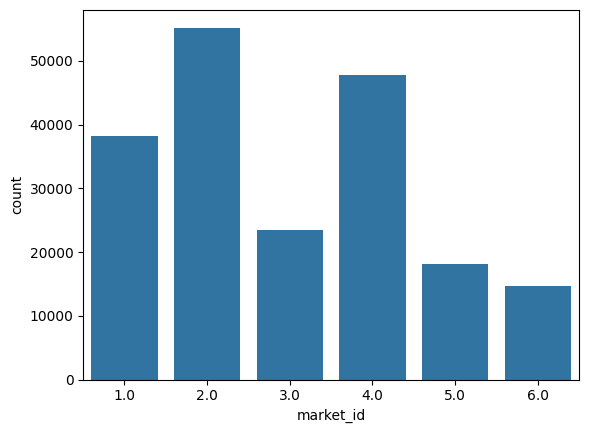

In [275]:
import seaborn as sns
sns.countplot(data=X,x='market_id')

(0.0, 600.0)

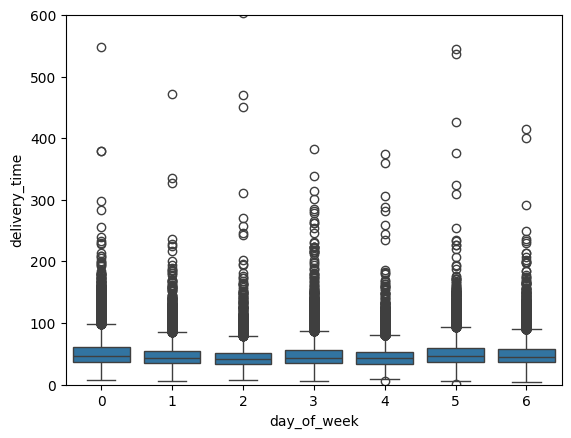

In [276]:
sns.boxplot(x='day_of_week', y='delivery_time', data=X)
plt.ylim(0,600)

(0.0, 600.0)

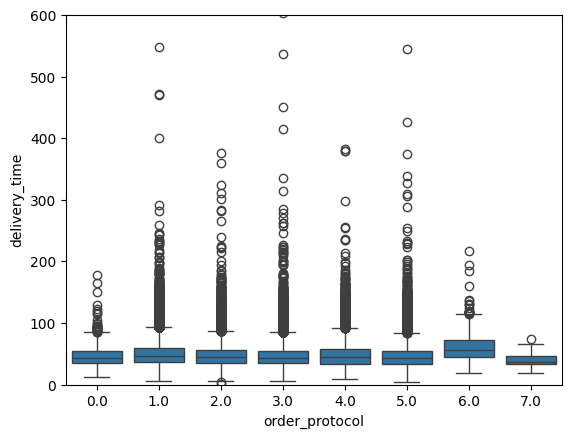

In [277]:
import matplotlib.pyplot as plt
sns.boxplot(x='order_protocol', y='delivery_time', data=X)
plt.ylim(0,600)

(0.0, 600.0)

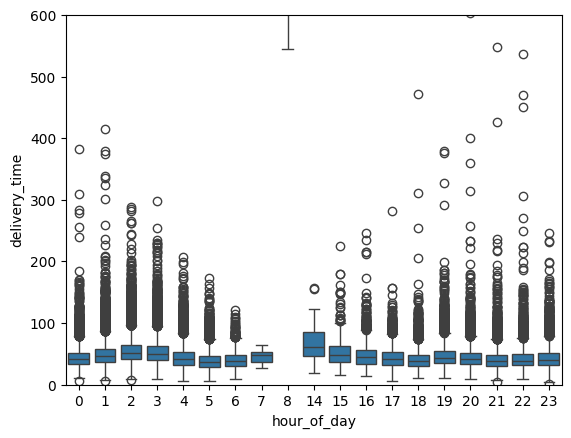

In [278]:
import matplotlib.pyplot as plt
sns.boxplot(x='hour_of_day', y='delivery_time', data=X)
plt.ylim(0,600)

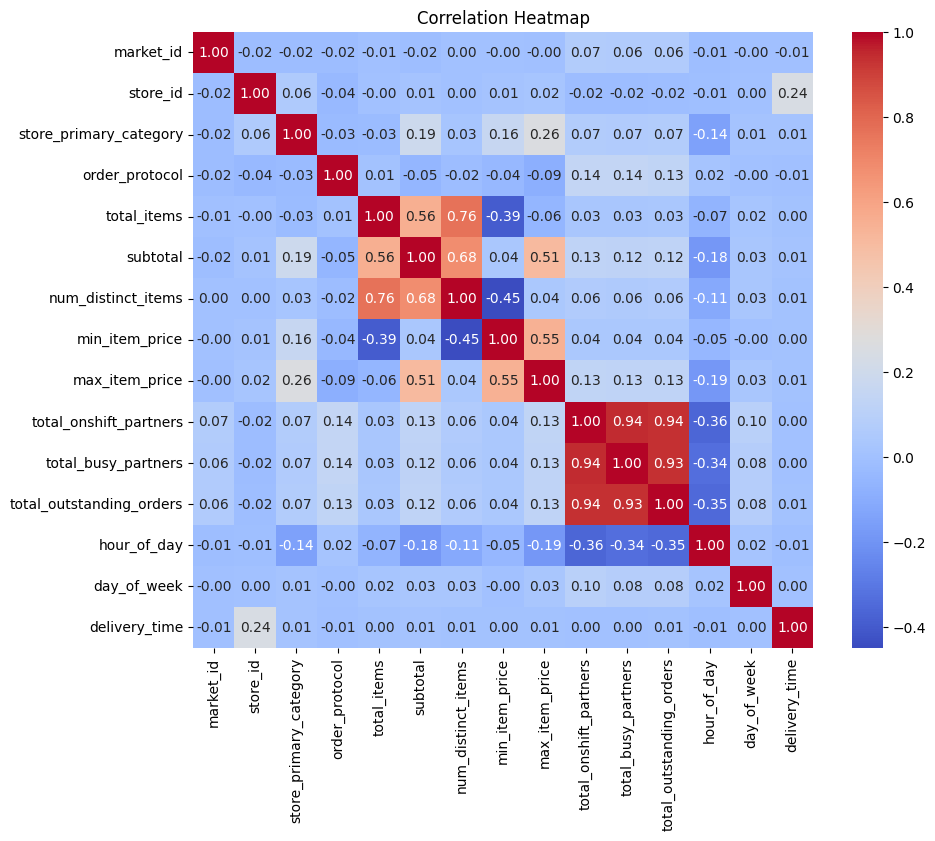

In [279]:
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**We have high correlation between 'total_onshift_partners', total_busy_partners','total_outstanding_orders' since NN can overcome the multicollinearity issue either we can ignore or remove the columns based on VIF score. I choose to ignore for this usecase.**

In [280]:
X.columns

Index(['market_id', 'store_id', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'hour_of_day', 'day_of_week',
       'delivery_time'],
      dtype='object')

**6) Check if the data contains outliers**

**Removing outliers by any method**

**Plotting the data again to see if anything has improved**

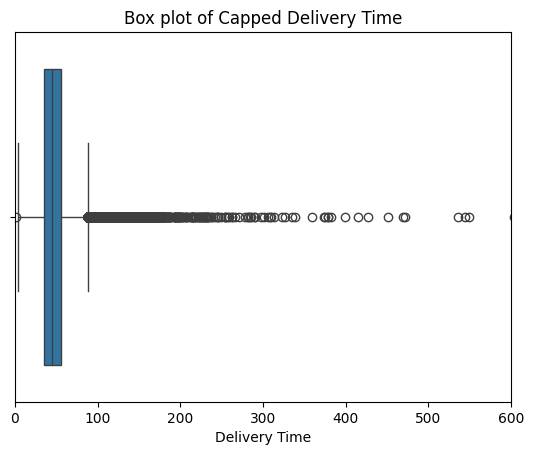

In [281]:
sns.boxplot(x=X['delivery_time'])
plt.title('Box plot of Capped Delivery Time')
plt.xlabel('Delivery Time')
plt.xlim(0,600)
plt.show()


In [282]:
Q1 = X['delivery_time'].quantile(0.25)
Q3 = X['delivery_time'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
X[(X['delivery_time'] < lower_bound) | (X['delivery_time'] > upper_bound)]


market_id   store_id  store_primary_category  order_protocol  \
11            3.0  51.927260               47.544164             1.0   
23            1.0  60.148771               70.207641             1.0   
24            1.0  60.148771               70.207641             1.0   
88            3.0  48.429532               44.549703             1.0   
117           3.0  52.386257               44.766795             3.0   
...           ...        ...                     ...             ...   
197371        1.0  55.013558               43.860182             4.0   
197382        1.0  55.013558               43.860182             4.0   
197386        1.0  55.013558               43.860182             4.0   
197414        1.0  55.013558               43.860182             4.0   
197418        1.0  55.013558               43.860182             4.0   

        total_items  subtotal  num_distinct_items  min_item_price  \
11                2      2200                   2             600   
23                7     14900                   5            1200   
24                3      3400                   3            1400   
88                2      1706                   2             749   
117               3      2925                   2             675   
...             ...       ...                 ...             ...   
197371            4      2682                   4             357   
197382            1       699                   1             649   
197386            2       703                   2             145   
197414            5      2325                   5             307   
197418            2      1528                   2             639   

        max_item_price  total_onshift_partners  total_busy_partners  \
11                1600                     3.0                  3.0   
23                3900                     8.0                 11.0   
24                2100                    22.0                 21.0   
88                 789                    23.0                 23.0   
117               1125                     4.0                  4.0   
...                ...                     ...                  ...   
197371             876                    31.0                 26.0   
197382             649                    12.0                  9.0   
197386             339                    23.0                 26.0   
197414             610                    48.0                 44.0   
197418             729                    26.0                 29.0   

        total_outstanding_orders  hour_of_day  day_of_week  delivery_time  
11                           4.0            4            0     134.450000  
23                          11.0            5            0      97.333333  
24                          39.0            2            0      92.900000  
88                          23.0           20            3      93.283333  
117                          6.0           20            0      96.166667  
...                          ...          ...          ...            ...  
197371                      45.0           21            0     107.783333  
197382                       9.0           22            2     105.233333  
197386                      39.0           21            0     105.100000  
197414                      66.0            2            1     134.566667  
197418                      34.0           20            4      94.250000  

[6278 rows x 15 columns]

In [283]:
X['delivery_time'] = X['delivery_time'].clip(lower=lower_bound, upper=upper_bound)


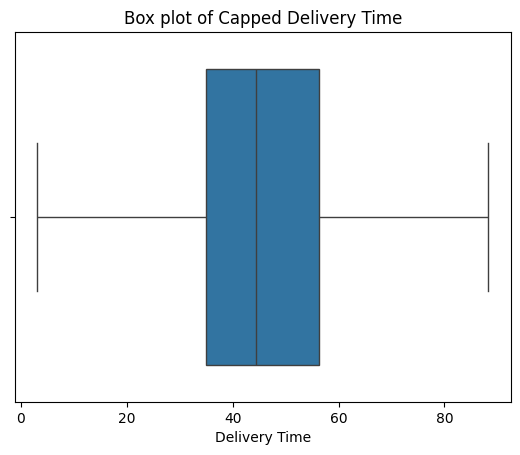

In [284]:
sns.boxplot(x=X['delivery_time'])
plt.title('Box plot of Capped Delivery Time')
plt.xlabel('Delivery Time')
plt.show()


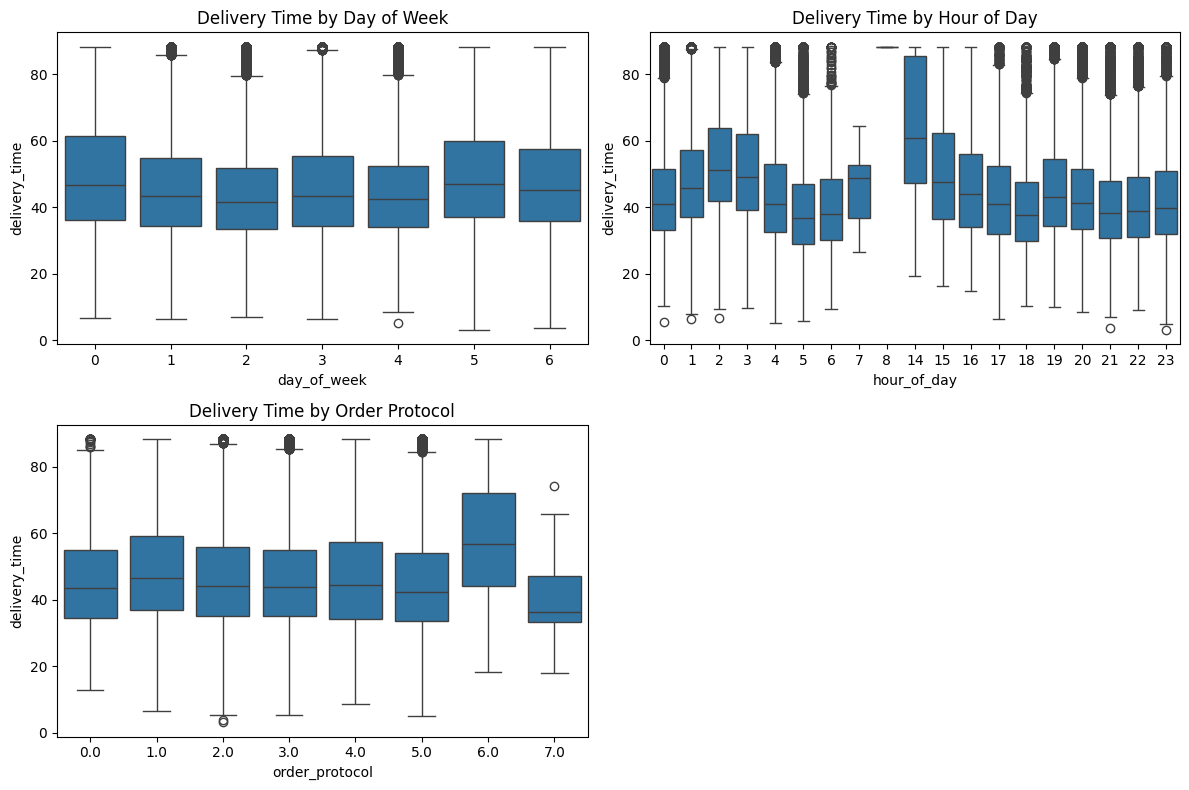

In [285]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='day_of_week', y='delivery_time', data=X)
plt.title('Delivery Time by Day of Week')

plt.subplot(2, 2, 2)
sns.boxplot(x='hour_of_day', y='delivery_time', data=X)
plt.title('Delivery Time by Hour of Day')

plt.subplot(2, 2, 3)
sns.boxplot(x='order_protocol', y='delivery_time', data=X)
plt.title('Delivery Time by Order Protocol')

plt.tight_layout()
plt.show()


After treating outliers the distribution of delivery time by day of week, hour of day and order protocol looks good.

**7) Split the data in train and test**

In [286]:
from sklearn.model_selection import train_test_split

y=X['delivery_time']
X_=X.drop('delivery_time',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


**8) Scaling the data for neural networks.**

In [287]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)
X_val_scaled = scaler_standard.transform(X_val)

**9) Creating a simple neural network**

**Trying different configurations**

**Understanding different activation functions, optimizers and other hyperparameters.**


In [288]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [289]:
def create_baseline():
    model = Sequential([
        Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(12, activation="relu"),
        Dense(1)
    ])
    return model

model = create_baseline()
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='mean_squared_error')

**10) Training the neural network for required amount of epochs**

In [290]:
history = model.fit(X_train_scaled, y_train, validation_data = (X_val_scaled, y_val),  epochs=10, batch_size=128)

Epoch 1/10
988/988 [==============================] - 3s 2ms/step - loss: 21216.8672 - val_loss: 265.4617
Epoch 2/10
988/988 [==============================] - 3s 3ms/step - loss: 267.1321 - val_loss: 265.4709
Epoch 3/10
988/988 [==============================] - 3s 3ms/step - loss: 267.1266 - val_loss: 265.4560
Epoch 4/10
988/988 [==============================] - 2s 2ms/step - loss: 267.1357 - val_loss: 265.4379
Epoch 5/10
988/988 [==============================] - 2s 2ms/step - loss: 267.1351 - val_loss: 265.4574
Epoch 6/10
988/988 [==============================] - 2s 2ms/step - loss: 267.1132 - val_loss: 265.4486
Epoch 7/10
988/988 [==============================] - 2s 2ms/step - loss: 267.1351 - val_loss: 265.4481
Epoch 8/10
988/988 [==============================] - 4s 4ms/step - loss: 267.1131 - val_loss: 265.4508
Epoch 9/10
988/988 [==============================] - 2s 2ms/step - loss: 267.1318 - val_loss: 265.4353
Epoch 10/10
988/988 [==============================] - 3s 3ms/

In [295]:
from keras.layers import LeakyReLU,BatchNormalization,Dropout
from keras.initializers import GlorotUniform,HeNormal
def create_baseline():
  model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), kernel_initializer=GlorotUniform()),
    #BatchNormalization(),
    LeakyReLU(alpha=0.01),
    #Dropout(0.2),
    Dense(16, kernel_initializer=GlorotUniform()),
    #BatchNormalization(),
    LeakyReLU(alpha=0.01),
    #Dropout(0.2),
    Dense(8, kernel_initializer=GlorotUniform()),
    #BatchNormalization(),
    LeakyReLU(alpha=0.01),
    #Dropout(0.2),
    Dense(4, kernel_initializer=GlorotUniform()),
    #BatchNormalization(),
    LeakyReLU(alpha=0.01),
    #Dropout(0.2),
    Dense(1)
])
  return model
model = create_baseline()
model.compile(optimizer='adam',
              loss='mean_squared_error')


In [296]:
history = model.fit(X_train_scaled, y_train, validation_data = (X_val_scaled, y_val),  epochs=30, batch_size=128)

Epoch 1/30
988/988 [==============================] - 4s 3ms/step - loss: 505.5921 - val_loss: 234.2709
Epoch 2/30
988/988 [==============================] - 4s 4ms/step - loss: 223.1478 - val_loss: 217.0363
Epoch 3/30
988/988 [==============================] - 2s 2ms/step - loss: 214.2216 - val_loss: 212.2965
Epoch 4/30
988/988 [==============================] - 3s 3ms/step - loss: 211.1011 - val_loss: 211.2271
Epoch 5/30
988/988 [==============================] - 3s 3ms/step - loss: 209.1142 - val_loss: 207.5794
Epoch 6/30
988/988 [==============================] - 4s 4ms/step - loss: 206.7218 - val_loss: 207.6244
Epoch 7/30
988/988 [==============================] - 3s 3ms/step - loss: 204.1932 - val_loss: 203.5589
Epoch 8/30
988/988 [==============================] - 3s 3ms/step - loss: 201.6435 - val_loss: 199.8735
Epoch 9/30
988/988 [==============================] - 3s 4ms/step - loss: 198.4533 - val_loss: 201.1535
Epoch 10/30
988/988 [==============================] - 4s 4ms/st

* Tried with no activation function since it is a regression probelm and then Relu, Leaky relu performs well.

* Tried using Batchnormalization for faster convergence,but it leads to overfitting, implementing drop out also didn't performed well because the loss was high.

* Used Adam and SGD optimizer loss with Adam was lesser than SGD.

* Glorot unform initializer performed well than HeNormal.

* After various trial and error the loss converges at around 176-178 with,
Kernel Initalizer: glorotuniform
Optimizer: Adam
Activation: Leaky Relu with alpha hyper parameter 0.01


**11) Plotting the losses and checking the accuracy of the model**

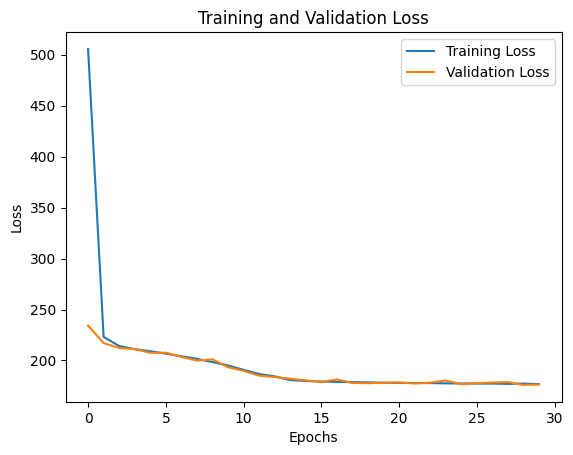

In [297]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**12) Checking its various metrics like MSE, RMSE, MAE**

In [298]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


1234/1234 [==============================] - 2s 2ms/step
Mean Squared Error (MSE): 175.83023181375756
Root Mean Squared Error (RMSE): 13.260099238458118
Mean Absolute Error (MAE): 10.295266447127483
